In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
df=pd.read_csv('Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [57]:
X=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
xpoly= poly.fit_transform(X_train)

model=LinearRegression()
model.fit(xpoly,y_train)






,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
model.coef_
# for every 1c increase in the temp icream sales decrease by 0.7units

array([ 0.        , -0.70641926,  1.87145125])

In [60]:
model.intercept_
#for 0c temp sales is 

np.float64(2.7683058308314497)

In [61]:
xtest_poly=poly.transform(X_test)
ypred=model.predict(xtest_poly)
ypred

array([10.24499852, 25.82807714, 31.8241041 , 24.61704204,  4.43380256,
        4.00785672,  3.58277492,  3.17865087,  7.86990452,  2.91591369])

In [62]:
xtest_poly

array([[ 1.        , -1.81893761,  3.30853403],
       [ 1.        ,  3.70405744, 13.7200415 ],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        ,  3.61077848, 13.03772122],
       [ 1.        , -0.77333004,  0.59803936],
       [ 1.        ,  1.02418081,  1.04894634],
       [ 1.        ,  0.87490503,  0.76545881],
       [ 1.        ,  0.69359887,  0.4810794 ],
       [ 1.        ,  1.85055193,  3.42454243],
       [ 1.        , -0.14963487,  0.02239059]])

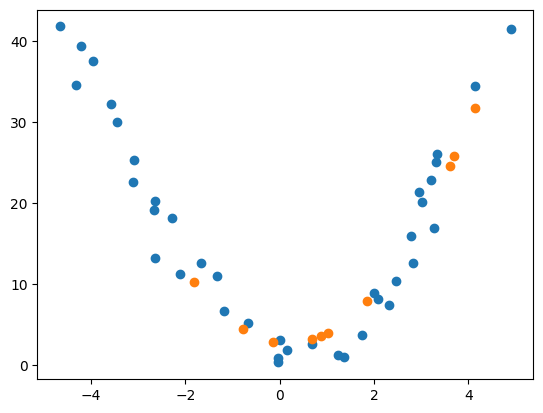

In [63]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,ypred)

In [64]:
model.score(xtest_poly,y_test)

0.8430551373706655

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

14.878796425342818

In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ypred)

3.2299819818670534